In [1]:
from HARK.utilities import CRRAutility, CRRAutilityP
import matplotlib.pyplot as plt
import numpy as np

CRRAutilityP_hack = lambda c, gam: float('inf') if c == 0.0 else CRRAutilityP(c, gam)

In [2]:
## Doing this because of the CRRAutility warnings

import warnings
warnings.filterwarnings('ignore')

### Consumption with Independent Shocks

_Notebook by Sebastian Benthall_

In this notebook, we will use the generic Bellman stage tools to build and solve a household consumption model with independent shocks (called elsewhere in HARK `ConsIndShock`).

We have predefined some stage definitions in this module:

In [3]:
import cons_stages

CRRA = cons_stages.CRRA
epsilon = cons_stages.epsilon

In [4]:
def display_stage(stage):
    print(f"x: {stage.inputs}, k: {stage.shocks}, a: {stage.actions}, y: {stage.outputs}")

The labor stage has no actions. In this stage, the agent experiences exogenous shocks and grows their resources.

In [5]:
l_stage = cons_stages.labor_stage

display_stage(l_stage)

x: ['b'], k: {'theta': <HARK.distribution.Lognormal object at 0x7ff40bb53310>, 'psi': <HARK.distribution.Lognormal object at 0x7ff40bb53280>}, a: [], y: ['m']


In [6]:
def l_v_y_der_terminal(y):
    return CRRAutilityP_hack(y['m'], CRRA)

l_sol = l_stage.solve(
    x_grid = {'b' : np.linspace(epsilon, 10,50)},
    v_y_der = l_v_y_der_terminal, ## Is this working, using the derivative value function here?
    ## Why?
    ### Is there a default set somewhere?
    shock_approx_params = {
            'psi' : 5, 
            'theta' : 5, 
        },
    policy_finder_method = 'opt'
)


solve: X: ['b'], K: ['theta', 'psi'], A: [], Y: ['m']
{'b': array([1.00000000e-04, 2.04179592e-01, 4.08259184e-01, 6.12338776e-01,
       8.16418367e-01, 1.02049796e+00, 1.22457755e+00, 1.42865714e+00,
       1.63273673e+00, 1.83681633e+00, 2.04089592e+00, 2.24497551e+00,
       2.44905510e+00, 2.65313469e+00, 2.85721429e+00, 3.06129388e+00,
       3.26537347e+00, 3.46945306e+00, 3.67353265e+00, 3.87761224e+00,
       4.08169184e+00, 4.28577143e+00, 4.48985102e+00, 4.69393061e+00,
       4.89801020e+00, 5.10208980e+00, 5.30616939e+00, 5.51024898e+00,
       5.71432857e+00, 5.91840816e+00, 6.12248776e+00, 6.32656735e+00,
       6.53064694e+00, 6.73472653e+00, 6.93880612e+00, 7.14288571e+00,
       7.34696531e+00, 7.55104490e+00, 7.75512449e+00, 7.95920408e+00,
       8.16328367e+00, 8.36736327e+00, 8.57144286e+00, 8.77552245e+00,
       8.97960204e+00, 9.18368163e+00, 9.38776122e+00, 9.59184082e+00,
       9.79592041e+00, 1.00000000e+01])} Field(name=None,type=None,default=<dataclasses.

$$v'_x(x) = \mathbb{E}_k\left[\frac{\partial q}{\partial x}(x, k, \pi^*(x, k)) \right] = \mathbb{E}_k\left[\beta v'_y(T(x, k, \pi^*(x, k)))\frac{\partial T}{\partial x} (x, k, \pi^*(x, k) \right]$$

$$v'_x(b) = \mathbb{E}_{\psi, \theta} \left[(G\psi)^{\rho - 1} v'_y \left( \frac{b + \theta}{G \psi} \right) \frac{1}{G\psi} \right]$$

In [7]:
l_sol.dataset

<xarray.Dataset>
Dimensions:  (b: 50)
Coordinates:
  * b        (b) float64 0.0001 0.2042 0.4083 0.6123 ... 9.388 9.592 9.796 10.0
Data variables:
    v_x_der  (b) float64 3.514e+07 1.464e+06 2.247e+05 ... 0.6761 0.6137 0.5581

In [8]:
l_sol.dataset['v_x_der']

<xarray.DataArray 'v_x_der' (b: 50)>
array([3.51440805e+07, 1.46392906e+06, 2.24654011e+05, 5.98726389e+04,
       2.15936019e+04, 9.41661812e+03, 4.67620341e+03, 2.55199921e+03,
       1.49615974e+03, 9.27884309e+02, 6.02128422e+02, 4.05589418e+02,
       2.81877156e+02, 2.01176282e+02, 1.46903669e+02, 1.09430433e+02,
       8.29547938e+01, 6.38665586e+01, 4.98548497e+01, 3.94029935e+01,
       3.14931064e+01, 2.54282407e+01, 2.07224924e+01, 1.70314948e+01,
       1.41075171e+01, 1.17698918e+01, 9.88519455e+00, 8.35374157e+00,
       7.10025486e+00, 6.06731858e+00, 5.21073350e+00, 4.49617964e+00,
       3.89679205e+00, 3.39138170e+00, 2.96311706e+00, 2.59853831e+00,
       2.28681381e+00, 2.01917485e+00, 1.78848266e+00, 1.58889434e+00,
       1.41560334e+00, 1.26463656e+00, 1.13269479e+00, 1.01702642e+00,
       9.15326978e-01, 8.25658808e-01, 7.46386482e-01, 6.76124638e-01,
       6.13695654e-01, 5.58095157e-01])
Coordinates:
  * b        (b) float64 0.0001 0.2042 0.4083 0.6123 ... 9.388 9.592 9.796 10.0

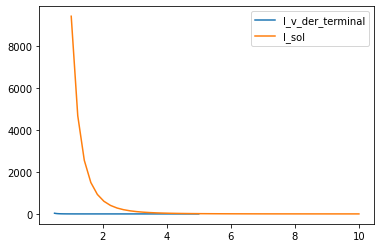

In [9]:
x = np.linspace(0.5, 5,100)

plt.plot(x, [CRRAutilityP_hack(xi, CRRA) for xi in x], label = "l_v_der_terminal")
plt.plot(l_sol.dataset['b'][5:], l_sol.dataset['v_x_der'][5:], label = 'l_sol')
plt.legend()

We can repeat these stages again and again to simulate the household earning and consuming over time.

But there's one small problem: the output of the consumption stage is $m$ while the input of the labor stage is $b$.

We need to transform $m$ to $b$.

In [10]:
from HARK.stage import Stage, backwards_induction

### TWIST STAGE

def twist(mapper):
    return Stage(
        transition = lambda x, k, a : {mapper[xi] : x[xi] for xi in mapper}, 
        transition_der_x = 1,
        inputs = list(mapper.keys()), 
        actions = [],
        outputs = list(mapper.values())
    )
    
      
twist_stage = twist({'a' : 'b'})



In [11]:
t_sol = twist_stage.solve(
    x_grid = {'a' : np.linspace(epsilon, 10,50)},
    next_sol = l_sol,
    shock_approx_params = {},
    policy_finder_method = 'opt'
)


solve: X: ['a'], K: [], A: [], Y: ['b']
{'a': array([1.00000000e-04, 2.04179592e-01, 4.08259184e-01, 6.12338776e-01,
       8.16418367e-01, 1.02049796e+00, 1.22457755e+00, 1.42865714e+00,
       1.63273673e+00, 1.83681633e+00, 2.04089592e+00, 2.24497551e+00,
       2.44905510e+00, 2.65313469e+00, 2.85721429e+00, 3.06129388e+00,
       3.26537347e+00, 3.46945306e+00, 3.67353265e+00, 3.87761224e+00,
       4.08169184e+00, 4.28577143e+00, 4.48985102e+00, 4.69393061e+00,
       4.89801020e+00, 5.10208980e+00, 5.30616939e+00, 5.51024898e+00,
       5.71432857e+00, 5.91840816e+00, 6.12248776e+00, 6.32656735e+00,
       6.53064694e+00, 6.73472653e+00, 6.93880612e+00, 7.14288571e+00,
       7.34696531e+00, 7.55104490e+00, 7.75512449e+00, 7.95920408e+00,
       8.16328367e+00, 8.36736327e+00, 8.57144286e+00, 8.77552245e+00,
       8.97960204e+00, 9.18368163e+00, 9.38776122e+00, 9.59184082e+00,
       9.79592041e+00, 1.00000000e+01])} Field(name=None,type=None,default=<dataclasses._MISSING_TYPE 

In [12]:
t_sol.dataset

<xarray.Dataset>
Dimensions:  (a: 50)
Coordinates:
  * a        (a) float64 0.0001 0.2042 0.4083 0.6123 ... 9.388 9.592 9.796 10.0
Data variables:
    v_x_der  (a) float64 3.514e+07 1.464e+06 2.247e+05 ... 0.6761 0.6137 0.5581

Note this is identical to the marginal value function for the labor stage, but relabeled.

The consumption stage models the transition $a = m - c$ where $c$ is the choice of consumption. It has no shocks.

In [13]:
c_stage = cons_stages.consumption_stage

c_sol = c_stage.solve(
    y_grid = {'a' : np.linspace(epsilon, 10,50)},
    v_y_der = t_sol.v_x_der,
    policy_finder_method = 'egm'
)

c_sol.dataset

solve: X: ['m'], K: [], A: ['c'], Y: ['a']
Field(name=None,type=None,default=<dataclasses._MISSING_TYPE object at 0x7ff48e3eba90>,default_factory=<class 'dict'>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=<dataclasses._MISSING_TYPE object at 0x7ff48e3eba90>,_field_type=None) {'a': array([1.00000000e-04, 2.04179592e-01, 4.08259184e-01, 6.12338776e-01,
       8.16418367e-01, 1.02049796e+00, 1.22457755e+00, 1.42865714e+00,
       1.63273673e+00, 1.83681633e+00, 2.04089592e+00, 2.24497551e+00,
       2.44905510e+00, 2.65313469e+00, 2.85721429e+00, 3.06129388e+00,
       3.26537347e+00, 3.46945306e+00, 3.67353265e+00, 3.87761224e+00,
       4.08169184e+00, 4.28577143e+00, 4.48985102e+00, 4.69393061e+00,
       4.89801020e+00, 5.10208980e+00, 5.30616939e+00, 5.51024898e+00,
       5.71432857e+00, 5.91840816e+00, 6.12248776e+00, 6.32656735e+00,
       6.53064694e+00, 6.73472653e+00, 6.93880612e+00, 7.14288571e+00,
       7.34696531e+00, 7.55104490e+00, 7.75512

<xarray.Dataset>
Dimensions:  (m: 51)
Coordinates:
  * m        (m) float64 0.0 0.03132 0.2631 0.494 ... 10.46 10.68 10.91 11.13
Data variables:
    v_x_der  (m) float64 inf 3.374e+07 1.405e+06 ... 0.6491 0.5891 0.5358
    pi*      (m) float64 0.0 0.03122 0.05894 0.08575 ... 1.069 1.09 1.112 1.133

**Revise the order**:

- Start with taking expectations over (labor) shocks
- Consumption stage
- twist, tick as necessary.


**Scoping parameters**

You can share parameters within a tick,
but not across ticks.

Parameters may be shared between stages.

In [14]:
x_space =  np.linspace(epsilon,4,500)

stages_data = [
    {
        'stage' : c_stage,
        'y_grid' : {'a' : x_space},
        'optimizer_args' :{
            'a0f' : lambda x: x['m'] - epsilon
        },
        'method' : 'egm'
    },
    {
        'stage' : twist({'a' : 'b'}),
        'x_grid' : {'a' : x_space},
    },
    {
        'stage' : l_stage,
        'x_grid' : {
            'b' : x_space,
        },
        'shock_approx_params' : {
            'psi' : 5, 
            'theta' : 5, 
        },
    },
    #tick
]

In [15]:
sols = backwards_induction(stages_data * 3, x_space, terminal_v_y_der = l_v_y_der_terminal)

8: X: ['b'], K: ['theta', 'psi'], A: [], Y: ['m']
solve: X: ['b'], K: ['theta', 'psi'], A: [], Y: ['m']
{'b': array([1.00000000e-04, 8.11583166e-03, 1.61316633e-02, 2.41474950e-02,
       3.21633267e-02, 4.01791583e-02, 4.81949900e-02, 5.62108216e-02,
       6.42266533e-02, 7.22424850e-02, 8.02583166e-02, 8.82741483e-02,
       9.62899800e-02, 1.04305812e-01, 1.12321643e-01, 1.20337475e-01,
       1.28353307e-01, 1.36369138e-01, 1.44384970e-01, 1.52400802e-01,
       1.60416633e-01, 1.68432465e-01, 1.76448297e-01, 1.84464128e-01,
       1.92479960e-01, 2.00495792e-01, 2.08511623e-01, 2.16527455e-01,
       2.24543287e-01, 2.32559118e-01, 2.40574950e-01, 2.48590782e-01,
       2.56606613e-01, 2.64622445e-01, 2.72638277e-01, 2.80654108e-01,
       2.88669940e-01, 2.96685772e-01, 3.04701603e-01, 3.12717435e-01,
       3.20733267e-01, 3.28749098e-01, 3.36764930e-01, 3.44780762e-01,
       3.52796593e-01, 3.60812425e-01, 3.68828257e-01, 3.76844088e-01,
       3.84859920e-01, 3.92875752e-01,

Time to backwards induce v_x: 0:00:50.561525
<xarray.Dataset>
Dimensions:  (b: 500)
Coordinates:
  * b        (b) float64 0.0001 0.008116 0.01613 0.02415 ... 3.984 3.992 4.0
Data variables:
    v_x_der  (b) float64 3.937e+07 3.327e+07 2.718e+07 ... 35.02 34.71 34.41
7: X: ['a'], K: [], A: [], Y: ['b']
solve: X: ['a'], K: [], A: [], Y: ['b']
{'a': array([1.00000000e-04, 8.11583166e-03, 1.61316633e-02, 2.41474950e-02,
       3.21633267e-02, 4.01791583e-02, 4.81949900e-02, 5.62108216e-02,
       6.42266533e-02, 7.22424850e-02, 8.02583166e-02, 8.82741483e-02,
       9.62899800e-02, 1.04305812e-01, 1.12321643e-01, 1.20337475e-01,
       1.28353307e-01, 1.36369138e-01, 1.44384970e-01, 1.52400802e-01,
       1.60416633e-01, 1.68432465e-01, 1.76448297e-01, 1.84464128e-01,
       1.92479960e-01, 2.00495792e-01, 2.08511623e-01, 2.16527455e-01,
       2.24543287e-01, 2.32559118e-01, 2.40574950e-01, 2.48590782e-01,
       2.56606613e-01, 2.64622445e-01, 2.72638277e-01, 2.80654108e-01,
       2.886

Time to backwards induce v_x: 0:00:01.221340
<xarray.Dataset>
Dimensions:  (a: 500)
Coordinates:
  * a        (a) float64 0.0001 0.008116 0.01613 0.02415 ... 3.984 3.992 4.0
Data variables:
    v_x_der  (a) float64 3.937e+07 3.327e+07 2.718e+07 ... 35.02 34.71 34.41
6: X: ['m'], K: [], A: ['c'], Y: ['a']
solve: X: ['m'], K: [], A: ['c'], Y: ['a']
None {'a': array([1.00000000e-04, 8.11583166e-03, 1.61316633e-02, 2.41474950e-02,
       3.21633267e-02, 4.01791583e-02, 4.81949900e-02, 5.62108216e-02,
       6.42266533e-02, 7.22424850e-02, 8.02583166e-02, 8.82741483e-02,
       9.62899800e-02, 1.04305812e-01, 1.12321643e-01, 1.20337475e-01,
       1.28353307e-01, 1.36369138e-01, 1.44384970e-01, 1.52400802e-01,
       1.60416633e-01, 1.68432465e-01, 1.76448297e-01, 1.84464128e-01,
       1.92479960e-01, 2.00495792e-01, 2.08511623e-01, 2.16527455e-01,
       2.24543287e-01, 2.32559118e-01, 2.40574950e-01, 2.48590782e-01,
       2.56606613e-01, 2.64622445e-01, 2.72638277e-01, 2.80654108e-01,
 

pi_star.coords: Coordinates:
  * m        (m) float64 0.0 0.03062 0.03968 0.04899 ... 4.47 4.479 4.488 4.497
Time to backwards induce v_x: 0:00:01.314106
<xarray.Dataset>
Dimensions:  (m: 501)
Coordinates:
  * m        (m) float64 0.0 0.03062 0.03968 0.04899 ... 4.47 4.479 4.488 4.497
Data variables:
    v_x_der  (m) float64 inf 3.779e+07 3.194e+07 2.609e+07 ... 33.62 33.32 33.03
    pi*      (m) float64 0.0 0.03052 0.03156 0.03286 ... 0.4951 0.496 0.4968
5: X: ['b'], K: ['theta', 'psi'], A: [], Y: ['m']
solve: X: ['b'], K: ['theta', 'psi'], A: [], Y: ['m']
{'b': array([1.00000000e-04, 8.11583166e-03, 1.61316633e-02, 2.41474950e-02,
       3.21633267e-02, 4.01791583e-02, 4.81949900e-02, 5.62108216e-02,
       6.42266533e-02, 7.22424850e-02, 8.02583166e-02, 8.82741483e-02,
       9.62899800e-02, 1.04305812e-01, 1.12321643e-01, 1.20337475e-01,
       1.28353307e-01, 1.36369138e-01, 1.44384970e-01, 1.52400802e-01,
       1.60416633e-01, 1.68432465e-01, 1.76448297e-01, 1.84464128e-01,
    

Time to backwards induce v_x: 0:00:49.682571
<xarray.Dataset>
Dimensions:  (b: 500)
Coordinates:
  * b        (b) float64 0.0001 0.008116 0.01613 0.02415 ... 3.984 3.992 4.0
Data variables:
    v_x_der  (b) float64 2.349e+08 2.281e+08 2.214e+08 ... 5.273e+05 5.24e+05
4: X: ['a'], K: [], A: [], Y: ['b']
solve: X: ['a'], K: [], A: [], Y: ['b']
{'a': array([1.00000000e-04, 8.11583166e-03, 1.61316633e-02, 2.41474950e-02,
       3.21633267e-02, 4.01791583e-02, 4.81949900e-02, 5.62108216e-02,
       6.42266533e-02, 7.22424850e-02, 8.02583166e-02, 8.82741483e-02,
       9.62899800e-02, 1.04305812e-01, 1.12321643e-01, 1.20337475e-01,
       1.28353307e-01, 1.36369138e-01, 1.44384970e-01, 1.52400802e-01,
       1.60416633e-01, 1.68432465e-01, 1.76448297e-01, 1.84464128e-01,
       1.92479960e-01, 2.00495792e-01, 2.08511623e-01, 2.16527455e-01,
       2.24543287e-01, 2.32559118e-01, 2.40574950e-01, 2.48590782e-01,
       2.56606613e-01, 2.64622445e-01, 2.72638277e-01, 2.80654108e-01,
       2.88

Time to backwards induce v_x: 0:00:01.199137
<xarray.Dataset>
Dimensions:  (a: 500)
Coordinates:
  * a        (a) float64 0.0001 0.008116 0.01613 0.02415 ... 3.984 3.992 4.0
Data variables:
    v_x_der  (a) float64 2.349e+08 2.281e+08 2.214e+08 ... 5.273e+05 5.24e+05
3: X: ['m'], K: [], A: ['c'], Y: ['a']
solve: X: ['m'], K: [], A: ['c'], Y: ['a']
None {'a': array([1.00000000e-04, 8.11583166e-03, 1.61316633e-02, 2.41474950e-02,
       3.21633267e-02, 4.01791583e-02, 4.81949900e-02, 5.62108216e-02,
       6.42266533e-02, 7.22424850e-02, 8.02583166e-02, 8.82741483e-02,
       9.62899800e-02, 1.04305812e-01, 1.12321643e-01, 1.20337475e-01,
       1.28353307e-01, 1.36369138e-01, 1.44384970e-01, 1.52400802e-01,
       1.60416633e-01, 1.68432465e-01, 1.76448297e-01, 1.84464128e-01,
       1.92479960e-01, 2.00495792e-01, 2.08511623e-01, 2.16527455e-01,
       2.24543287e-01, 2.32559118e-01, 2.40574950e-01, 2.48590782e-01,
       2.56606613e-01, 2.64622445e-01, 2.72638277e-01, 2.80654108e-01,


pi_star.coords: Coordinates:
  * m        (m) float64 0.0 0.02145 0.02959 0.03774 ... 4.048 4.056 4.064 4.072
Time to backwards induce v_x: 0:00:01.266113
<xarray.Dataset>
Dimensions:  (m: 501)
Coordinates:
  * m        (m) float64 0.0 0.02145 0.02959 0.03774 ... 4.048 4.056 4.064 4.072
Data variables:
    v_x_der  (m) float64 inf 2.255e+08 2.19e+08 ... 5.095e+05 5.063e+05 5.03e+05
    pi*      (m) float64 0.0 0.02135 0.02147 0.0216 ... 0.07221 0.0723 0.07239
2: X: ['b'], K: ['theta', 'psi'], A: [], Y: ['m']
solve: X: ['b'], K: ['theta', 'psi'], A: [], Y: ['m']
{'b': array([1.00000000e-04, 8.11583166e-03, 1.61316633e-02, 2.41474950e-02,
       3.21633267e-02, 4.01791583e-02, 4.81949900e-02, 5.62108216e-02,
       6.42266533e-02, 7.22424850e-02, 8.02583166e-02, 8.82741483e-02,
       9.62899800e-02, 1.04305812e-01, 1.12321643e-01, 1.20337475e-01,
       1.28353307e-01, 1.36369138e-01, 1.44384970e-01, 1.52400802e-01,
       1.60416633e-01, 1.68432465e-01, 1.76448297e-01, 1.84464128e-01,


Time to backwards induce v_x: 0:00:49.404798
<xarray.Dataset>
Dimensions:  (b: 500)
Coordinates:
  * b        (b) float64 0.0001 0.008116 0.01613 0.02415 ... 3.984 3.992 4.0
Data variables:
    v_x_der  (b) float64 3.348e+09 3.332e+09 3.316e+09 ... 5.106e+08 5.092e+08
1: X: ['a'], K: [], A: [], Y: ['b']
solve: X: ['a'], K: [], A: [], Y: ['b']
{'a': array([1.00000000e-04, 8.11583166e-03, 1.61316633e-02, 2.41474950e-02,
       3.21633267e-02, 4.01791583e-02, 4.81949900e-02, 5.62108216e-02,
       6.42266533e-02, 7.22424850e-02, 8.02583166e-02, 8.82741483e-02,
       9.62899800e-02, 1.04305812e-01, 1.12321643e-01, 1.20337475e-01,
       1.28353307e-01, 1.36369138e-01, 1.44384970e-01, 1.52400802e-01,
       1.60416633e-01, 1.68432465e-01, 1.76448297e-01, 1.84464128e-01,
       1.92479960e-01, 2.00495792e-01, 2.08511623e-01, 2.16527455e-01,
       2.24543287e-01, 2.32559118e-01, 2.40574950e-01, 2.48590782e-01,
       2.56606613e-01, 2.64622445e-01, 2.72638277e-01, 2.80654108e-01,
       2.8

Time to backwards induce v_x: 0:00:01.194232
<xarray.Dataset>
Dimensions:  (a: 500)
Coordinates:
  * a        (a) float64 0.0001 0.008116 0.01613 0.02415 ... 3.984 3.992 4.0
Data variables:
    v_x_der  (a) float64 3.348e+09 3.332e+09 3.316e+09 ... 5.106e+08 5.092e+08
0: X: ['m'], K: [], A: ['c'], Y: ['a']
solve: X: ['m'], K: [], A: ['c'], Y: ['a']
None {'a': array([1.00000000e-04, 8.11583166e-03, 1.61316633e-02, 2.41474950e-02,
       3.21633267e-02, 4.01791583e-02, 4.81949900e-02, 5.62108216e-02,
       6.42266533e-02, 7.22424850e-02, 8.02583166e-02, 8.82741483e-02,
       9.62899800e-02, 1.04305812e-01, 1.12321643e-01, 1.20337475e-01,
       1.28353307e-01, 1.36369138e-01, 1.44384970e-01, 1.52400802e-01,
       1.60416633e-01, 1.68432465e-01, 1.76448297e-01, 1.84464128e-01,
       1.92479960e-01, 2.00495792e-01, 2.08511623e-01, 2.16527455e-01,
       2.24543287e-01, 2.32559118e-01, 2.40574950e-01, 2.48590782e-01,
       2.56606613e-01, 2.64622445e-01, 2.72638277e-01, 2.80654108e-01,

pi_star.coords: Coordinates:
  * m        (m) float64 0.0 0.01265 0.02068 0.0287 ... 3.994 4.002 4.01 4.018
Time to backwards induce v_x: 0:00:01.259921
<xarray.Dataset>
Dimensions:  (m: 501)
Coordinates:
  * m        (m) float64 0.0 0.01265 0.02068 0.0287 ... 3.994 4.002 4.01 4.018
Data variables:
    v_x_der  (m) float64 inf 3.214e+09 3.199e+09 ... 4.902e+08 4.888e+08
    pi*      (m) float64 0.0 0.01255 0.01256 0.01257 ... 0.01827 0.01828 0.01829


In [16]:
sols[-1].dataset['v_x_der']

<xarray.DataArray 'v_x_der' (b: 500)>
array([3.93664795e+07, 3.32726370e+07, 2.71792228e+07, 2.12992542e+07,
       1.90833767e+07, 1.68703332e+07, 1.46574030e+07, 1.24445570e+07,
       1.02318124e+07, 9.16686493e+06, 8.23266628e+06, 7.29853437e+06,
       6.36441221e+06, 5.43035285e+06, 4.86159591e+06, 4.42056559e+06,
       3.97955021e+06, 3.53854657e+06, 3.09756470e+06, 2.78150975e+06,
       2.55447325e+06, 2.32743933e+06, 2.10041548e+06, 1.87339460e+06,
       1.68981323e+06, 1.56458522e+06, 1.43936074e+06, 1.31414012e+06,
       1.18892129e+06, 1.07782566e+06, 1.00467157e+06, 9.31601468e+05,
       8.58532180e+05, 7.85465007e+05, 7.15740537e+05, 6.70883365e+05,
       6.26201916e+05, 5.81521194e+05, 5.36841751e+05, 4.92175981e+05,
       4.62987897e+05, 4.34564390e+05, 4.06141734e+05, 3.77719449e+05,
       3.49304904e+05, 3.28611398e+05, 3.09908873e+05, 2.91206830e+05,
       2.72504958e+05, 2.53806559e+05, 2.38949180e+05, 2.26278261e+05,
       2.13607485e+05, 2.00936970e+05, 1.88266720e+05, 1.77450938e+05,
       1.68644653e+05, 1.59838462e+05, 1.51032489e+05, 1.42226572e+05,
       1.34242213e+05, 1.27981544e+05, 1.21722440e+05, 1.15463416e+05,
       1.09204481e+05, 1.03247733e+05, 9.86896862e+04, 9.41515921e+04,
       8.96135287e+04, 8.50755658e+04, 8.05745520e+04, 7.71956783e+04,
       7.38464809e+04, 7.04973343e+04, 6.71482326e+04, 6.38018529e+04,
       6.11606464e+04, 5.86492267e+04, 5.61378616e+04, 5.36265105e+04,
...
       7.27285270e+01, 7.19821342e+01, 7.12640118e+01, 7.05458912e+01,
       6.98277731e+01, 6.91096567e+01, 6.84035167e+01, 6.77286392e+01,
       6.70546694e+01, 6.63807015e+01, 6.57067355e+01, 6.50393853e+01,
       6.44037031e+01, 6.37707233e+01, 6.31377449e+01, 6.25047686e+01,
       6.18744027e+01, 6.12746235e+01, 6.06797302e+01, 6.00848384e+01,
       5.94899484e+01, 5.88966595e+01, 5.83279694e+01, 5.77684937e+01,
       5.72090198e+01, 5.66495473e+01, 5.60908511e+01, 5.55513594e+01,
       5.50248457e+01, 5.44983335e+01, 5.39718227e+01, 5.34453582e+01,
       5.29333683e+01, 5.24375549e+01, 5.19417427e+01, 5.14459319e+01,
       5.09501226e+01, 5.04634916e+01, 4.99962477e+01, 4.95290504e+01,
       4.90618545e+01, 4.85946596e+01, 4.81331042e+01, 4.76913340e+01,
       4.72508282e+01, 4.68103234e+01, 4.63698199e+01, 4.59318547e+01,
       4.55139416e+01, 4.50983507e+01, 4.46827608e+01, 4.42671722e+01,
       4.38529132e+01, 4.34558551e+01, 4.30635376e+01, 4.26712212e+01,
       4.22789057e+01, 4.18873392e+01, 4.15094623e+01, 4.11388998e+01,
       4.07683384e+01, 4.03977778e+01, 4.00274486e+01, 3.96677041e+01,
       3.93174912e+01, 3.89672793e+01, 3.86170682e+01, 3.82668596e+01,
       3.79240296e+01, 3.75928643e+01, 3.72616998e+01, 3.69305363e+01,
       3.65993735e+01, 3.62728611e+01, 3.59590304e+01, 3.56457065e+01,
       3.53323834e+01, 3.50190610e+01, 3.47082719e+01, 3.44104229e+01])
Coordinates:
  * b        (b) float64 0.0001 0.008116 0.01613 0.02415 ... 3.984 3.992 4.0

In [17]:
l_sol = l_stage.solve(
    x_grid = {'b' : x_space},
    y_grid = {'m' : x_space},
    v_y_der = l_v_y_der_terminal, ## Is this working, using the derivative value function here?
    ## Why?
    ### Is there a default set somewhere?
    shock_approx_params = {
            'psi' : 5, 
            'theta' : 5, 
        },
    policy_finder_method = 'opt'
)

solve: X: ['b'], K: ['theta', 'psi'], A: [], Y: ['m']
{'b': array([1.00000000e-04, 8.11583166e-03, 1.61316633e-02, 2.41474950e-02,
       3.21633267e-02, 4.01791583e-02, 4.81949900e-02, 5.62108216e-02,
       6.42266533e-02, 7.22424850e-02, 8.02583166e-02, 8.82741483e-02,
       9.62899800e-02, 1.04305812e-01, 1.12321643e-01, 1.20337475e-01,
       1.28353307e-01, 1.36369138e-01, 1.44384970e-01, 1.52400802e-01,
       1.60416633e-01, 1.68432465e-01, 1.76448297e-01, 1.84464128e-01,
       1.92479960e-01, 2.00495792e-01, 2.08511623e-01, 2.16527455e-01,
       2.24543287e-01, 2.32559118e-01, 2.40574950e-01, 2.48590782e-01,
       2.56606613e-01, 2.64622445e-01, 2.72638277e-01, 2.80654108e-01,
       2.88669940e-01, 2.96685772e-01, 3.04701603e-01, 3.12717435e-01,
       3.20733267e-01, 3.28749098e-01, 3.36764930e-01, 3.44780762e-01,
       3.52796593e-01, 3.60812425e-01, 3.68828257e-01, 3.76844088e-01,
       3.84859920e-01, 3.92875752e-01, 4.00891583e-01, 4.08907415e-01,
       4.16923246

Note: There is a small difference between the computed $v^{l'}_x$ with backwards induction and the same function computed by passing in the terminal $v^{l'}_y$ directly. This is because in the former case the terminal marginal value function is first passed to an interpolator. The disparity is small, but worse for lower values. 

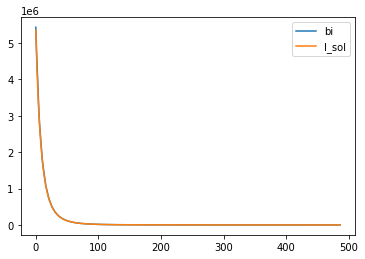

In [18]:
plt.plot(sols[-1].dataset['v_x_der'][13:], label="bi")
plt.plot(l_sol.dataset['v_x_der'][13:], label='l_sol')
plt.legend()

In [23]:
c_sol = c_stage.solve(
    y_grid = {'a' : np.linspace(epsilon, 4,500)},
    next_sol = sols[-2],
    policy_finder_method = 'egm'
)

solve: X: ['m'], K: [], A: ['c'], Y: ['a']
Field(name=None,type=None,default=<dataclasses._MISSING_TYPE object at 0x7ff48e3eba90>,default_factory=<class 'dict'>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=<dataclasses._MISSING_TYPE object at 0x7ff48e3eba90>,_field_type=None) {'a': array([1.00000000e-04, 8.11583166e-03, 1.61316633e-02, 2.41474950e-02,
       3.21633267e-02, 4.01791583e-02, 4.81949900e-02, 5.62108216e-02,
       6.42266533e-02, 7.22424850e-02, 8.02583166e-02, 8.82741483e-02,
       9.62899800e-02, 1.04305812e-01, 1.12321643e-01, 1.20337475e-01,
       1.28353307e-01, 1.36369138e-01, 1.44384970e-01, 1.52400802e-01,
       1.60416633e-01, 1.68432465e-01, 1.76448297e-01, 1.84464128e-01,
       1.92479960e-01, 2.00495792e-01, 2.08511623e-01, 2.16527455e-01,
       2.24543287e-01, 2.32559118e-01, 2.40574950e-01, 2.48590782e-01,
       2.56606613e-01, 2.64622445e-01, 2.72638277e-01, 2.80654108e-01,
       2.88669940e-01, 2.96685772e-01, 3.04701

pi_star.coords: Coordinates:
  * m        (m) float64 0.0 0.03062 0.03968 0.04899 ... 4.47 4.479 4.488 4.497


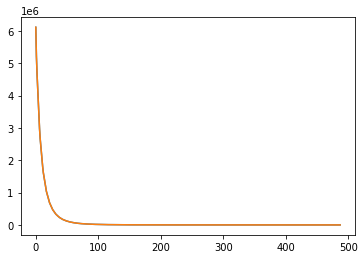

In [24]:
plt.plot(c_sol.dataset['v_x_der'][13:])
plt.plot(sols[-3].dataset['v_x_der'][13:])



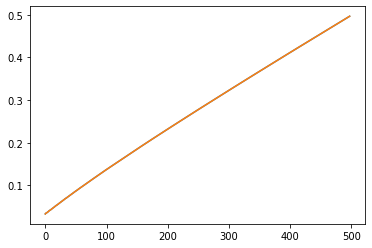

In [25]:
plt.plot(sols[-3].dataset['pi*'][3:])
plt.plot(c_sol.dataset['pi*'][3:])

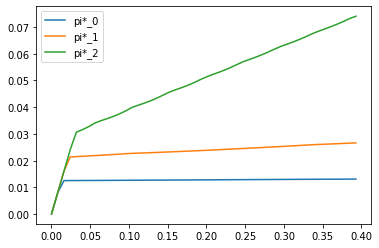

In [26]:
import matplotlib.pyplot as plt

for i, s in enumerate([sols[i] for i in (range(0,9, 3))]):
    plt.plot(x_space[:50], [s.pi_star({'m' : m,}, {})['c'] for m in x_space[:50]], label = f"pi*_{i}")
    
plt.legend()

In [ ]:
sols[-1].dataset['v_x_der'][13:]

In [ ]:
l_sol.dataset['v_x_der'][:13]

In [ ]:
plt.plot(x_space, [np.log(CRRAutilityP_hack(xi, CRRA)) for xi in x_space])
plt.plot(x_space, np.log(sols[-1].dataset['v_x_der']), label="bi")
plt.legend()

In [ ]:
sols[-1].dataset['v_x_der']